In [38]:
import pandas as pd 
import requests
from os import getenv
from dotenv import load_dotenv

load_dotenv()

API_KEY = getenv('API_KEY')

In [121]:
NUM_PAGES = 100
data = []


for i in range(1,NUM_PAGES+1):
    resp = requests.get(f'https://api.nasa.gov/neo/rest/v1/neo/browse?page={i}&api_key={API_KEY}')
    data += resp.json()['near_earth_objects']



In [243]:
from functools import reduce
def union(df: pd.DataFrame, dict_data:dict) -> dict:
    try:
        dict_data["distance"] = pd.json_normalize(dict_data['close_approach_data'])['miss_distance.kilometers'].min()
    except:
        pass

    data = df.append(pd.DataFrame(dict_data, columns=['id', 'absolute_magnitude_h', 'is_potentially_hazardous_asteroid', 'distance'],index=[0]),  
                     ignore_index=True,
    )
    return data

init = pd.DataFrame(data[0], columns=['absolute_magnitude_h', 'is_potentially_hazardous_asteroid'],index=[0])
init["distance"] = pd.json_normalize(data[0]['close_approach_data'])['miss_distance.kilometers'].min()
data_df = reduce(union, data[1:], init )
data_df['distance'] = data_df['distance'].apply(float)

In [244]:
asteroid_close_approach = {asteroid['id'] : asteroid['close_approach_data'] for asteroid in data}

In [126]:
print(f"{data_df['is_potentially_hazardous_asteroid'].sum()} asteroids are potentially hazardous")

537 asteroids are potentially hazardous


In [233]:
print(f"Mean distance:{data_df['distance'].mean()} and Standard Deviation: {data_df['distance'].std()}")

Mean distance:28557699.633082062 and Standard Deviation: 48435032.033591814


dict_keys(['links', 'id', 'neo_reference_id', 'name', 'name_limited', 'designation', 'nasa_jpl_url', 'absolute_magnitude_h', 'estimated_diameter', 'is_potentially_hazardous_asteroid', 'close_approach_data', 'orbital_data', 'is_sentry_object'])

<AxesSubplot:title={'center':'Overlapped density function of all asteroids and hazardous asteroids'}, xlabel='Absolute Magnitude [au]', ylabel='Probability Density'>

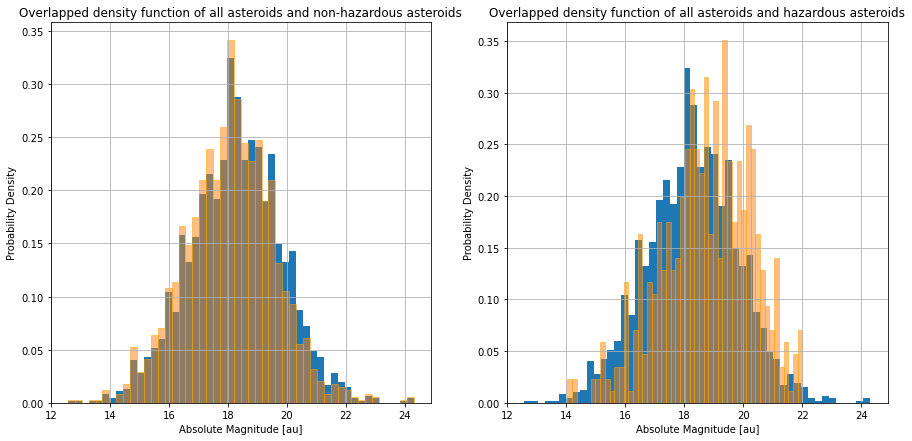

In [294]:
import matplotlib.pyplot as plt 

fig, axes = plt.subplots(1, 2, figsize=(15,7),)

axes[0].set_xlabel("Absolute Magnitude [au]")
axes[0].set_ylabel("Probability Density")

axes[0].set_title("Overlapped density function of all asteroids and non-hazardous asteroids")
data_df['absolute_magnitude_h'].hist(bins=50, density=True, ax=axes[0])
data_df['absolute_magnitude_h'][~data_df['is_potentially_hazardous_asteroid']].hist(bins=50, density=True, alpha=.5, edgecolor='orange', ax=axes[0])

axes[1].set_xlabel("Absolute Magnitude [au]")
axes[1].set_ylabel("Probability Density")

axes[1].set_title("Overlapped density function of all asteroids and hazardous asteroids")
data_df['absolute_magnitude_h'].hist(bins=50, density=True, ax=axes[1])
data_df['absolute_magnitude_h'][data_df['is_potentially_hazardous_asteroid']].hist(bins=50, density=True, alpha=.5, edgecolor='orange', ax=axes[1])